<a href="https://colab.research.google.com/github/AuroraaaMS/EDA_FundamentosML_AuroraMansilla/blob/main/Evaluacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#Importación de las librerías

In [2]:
from google.colab import files

uploaded = files.upload() #Importación del archivo

Saving data.csv to data.csv


In [3]:
df = pd.read_csv("data.csv", encoding='latin-1')
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


En esta sección se puede observar que se presentan los diversos tipos de variables. Siendo divididas en:

Variables cuantitativas discretas: InvoiceNo, Quantity, InvoiceDate
Variables cuantitativas continuas: UnitPrice

Variables cualitativas nominales: StockCode, Description, CustomerID, Country

In [4]:
display(df.head()) #Visualización de los datos en general

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
print("Valores nulos en cada columna:")
print(df.isnull().sum())

Valores nulos en cada columna:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


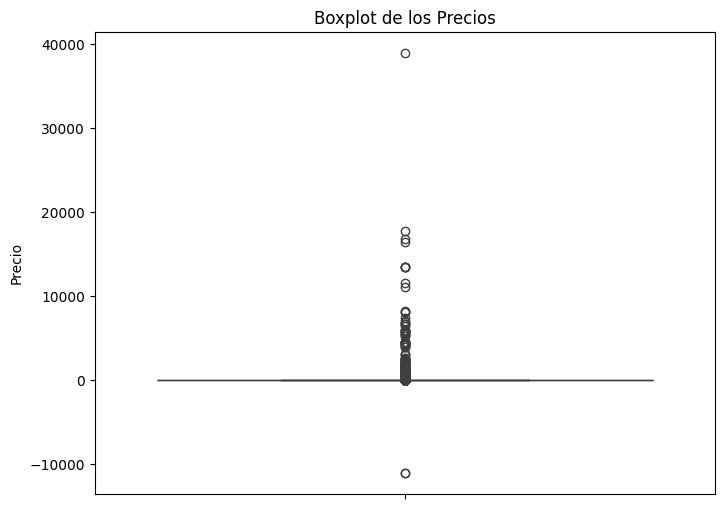

In [7]:


import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['UnitPrice'])
plt.title('Boxplot de los Precios')
plt.ylabel('Precio')
plt.show()


Aquí podemos observar la tendencia central de precios con unos cuantos valores atípicos que se disperan más hacia los extremos en valor unitario.

In [8]:
df_numeric = df.select_dtypes(include=['number'])

stats = df_numeric.agg(['mean', 'median', 'std', 'var', 'min', 'max'])

stats.loc['range'] = stats.loc['max'] - stats.loc['min']

stats.loc['coef_var'] = (stats.loc['std'] / stats.loc['mean']) * 100

display(stats)

,Quantity,UnitPrice,CustomerID
mean,9.552250,4.611114,1.528769e+04
median,3.000000,2.080000,1.515200e+04
std,218.081158,96.759853,1.713600e+03
var,47559.391409,9362.469164,2.936426e+06
min,-80995.000000,-11062.060000,1.234600e+04
max,80995.000000,38970.000000,1.828700e+04
range,161990.000000,50032.060000,5.941000e+03
coef_var,2283.034554,2098.405307,1.120902e+01


In [9]:


price_stats = df['UnitPrice'].describe()

# Add range and coefficient of variation
price_stats['range'] = price_stats['max'] - price_stats['min']
price_stats['coef_var'] = (price_stats['std'] / price_stats['mean']) * 100

price_stats


,UnitPrice
count,541909.000000
mean,4.611114
std,96.759853
min,-11062.060000
25%,1.250000
50%,2.080000
75%,4.130000
max,38970.000000
range,50032.060000
coef_var,2098.405307


Como se puede observar en la tabla acerca de los precios presentada previamente la desviación estándar es de 96.7, lo cual es bastante alto ya que se aleja de la media que es de 4.6. El rango también es bastante amplio al dejar un intervalo de 50032.

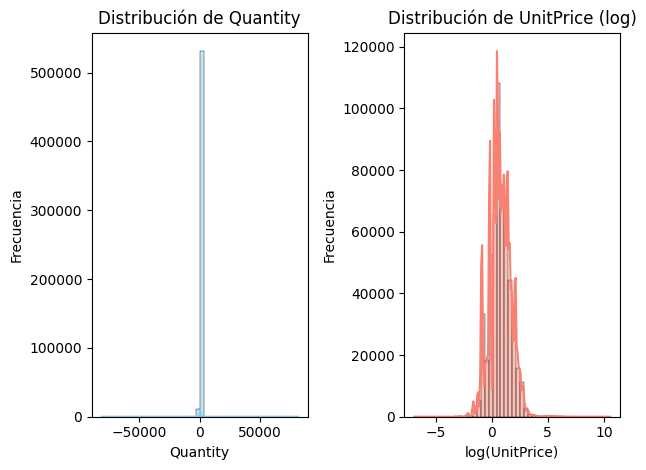

In [10]:
plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], kde=True, bins=50, color='skyblue')
plt.title('Distribución de Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frecuencia')

# Histograma para UnitPrice con transformación logarítmica
plt.subplot(1, 2, 2)
unit_price_log = df[df['UnitPrice'] > 0]['UnitPrice'].apply(np.log)
sns.histplot(unit_price_log, kde=True, bins=50, color='salmon')
plt.title('Distribución de UnitPrice (log)')
plt.xlabel('log(UnitPrice)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

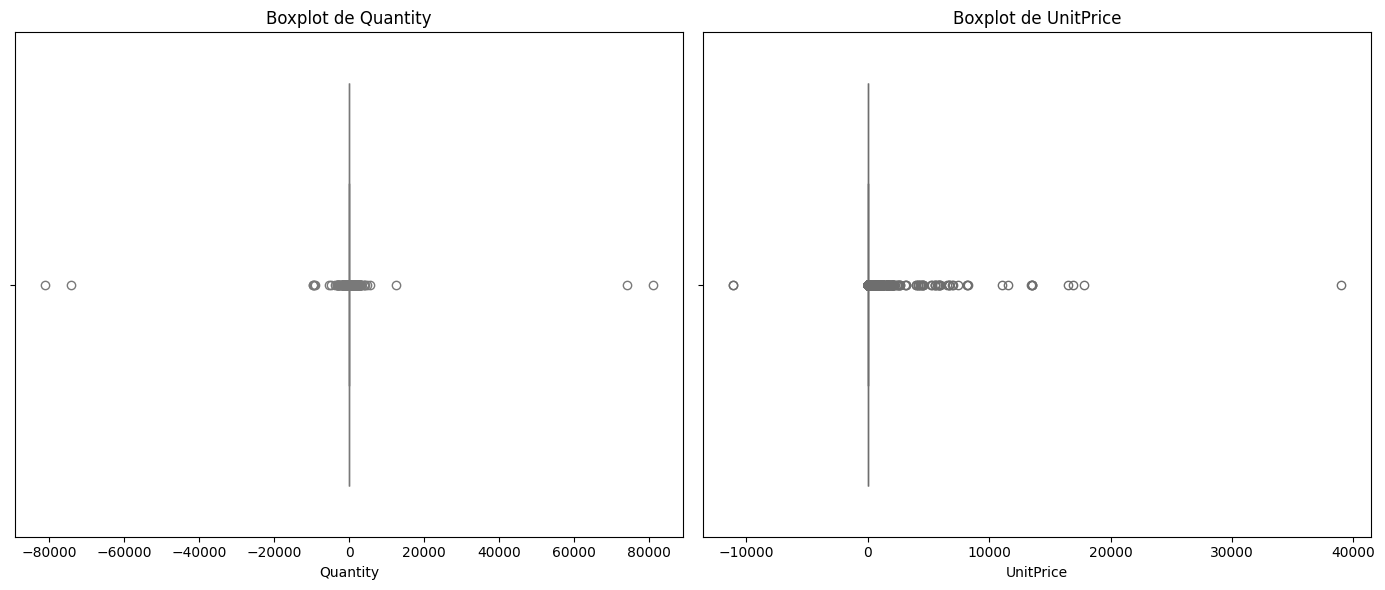

In [11]:
plt.figure(figsize=(14, 6))

# Boxplot para Quantity
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'], color='lightblue')
plt.title('Boxplot de Quantity')
plt.xlabel('Quantity')

# Boxplot para UnitPrice (sin transformación logarítmica)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnitPrice'], color='lightcoral')
plt.title('Boxplot de UnitPrice')
plt.xlabel('UnitPrice')

plt.tight_layout()
plt.show()

In [12]:
numerical_cols_for_analysis = ['UnitPrice', 'Quantity']

for col in numerical_cols_for_analysis:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    print(f"{col}:")
    print(f"  Asimetría: {skew:.2f} → ", end="")
    if skew > 0.5:
        print("Sesgo positivo")
    elif skew < -0.5:
        print("Sesgo negativo")
    else:
        print("Distribución simétrica")

    print(f"  Curtosis: {kurt:.2f} → ", end="")
    if kurt > 0.5:
        print("Leptocúrtica")
    elif kurt < -0.5:
        print("Platicúrtica")
    else:
        print("Mesocúrtica")
    print()

UnitPrice:
  Asimetría: 186.51 → Sesgo positivo
  Curtosis: 59005.72 → Leptocúrtica

Quantity:
  Asimetría: -0.26 → Distribución simétrica
  Curtosis: 119769.16 → Leptocúrtica



Histograma de variables numéricas con escala log:



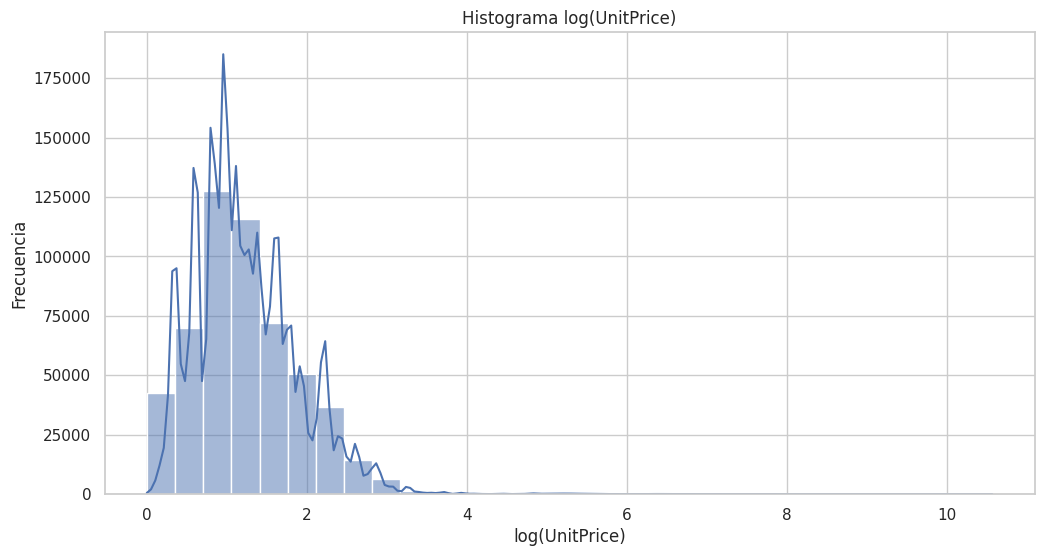

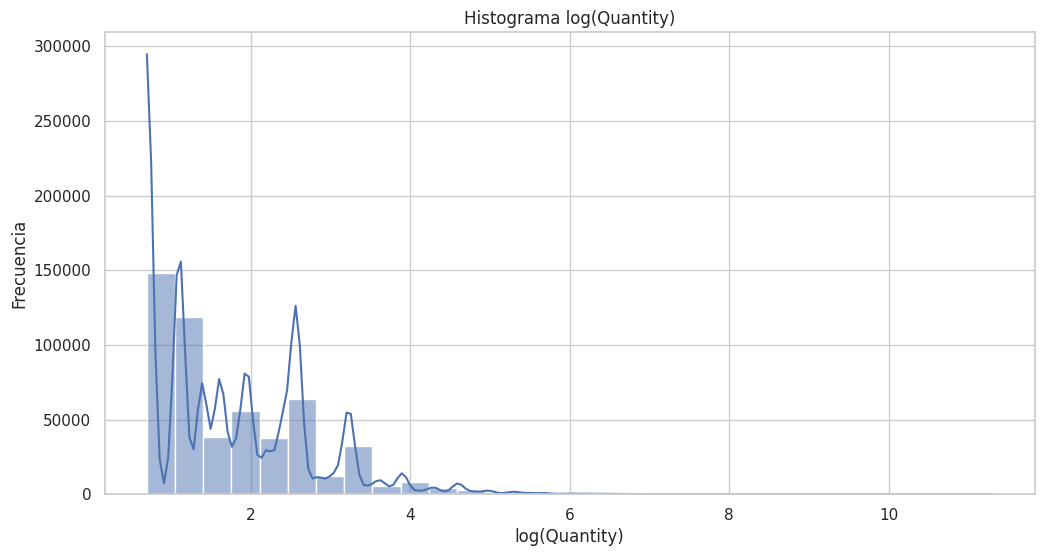

Boxplot de variables numéricas con escala log:



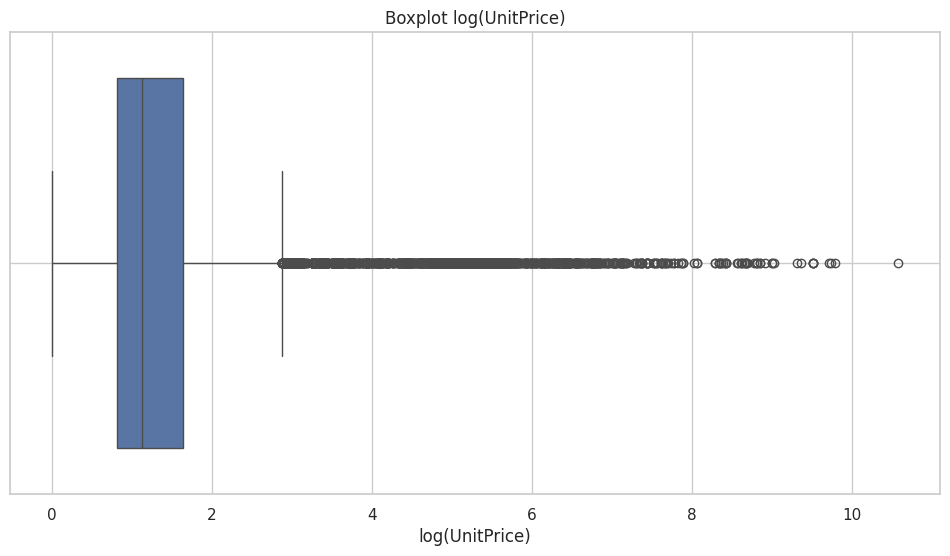

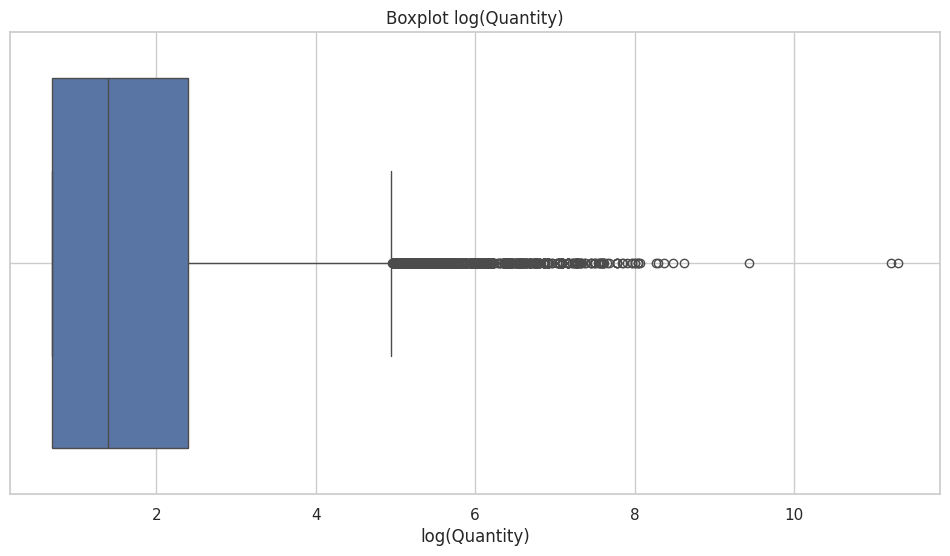


--- Tablas de frecuencia (variables categóricas) ---

Country:

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        

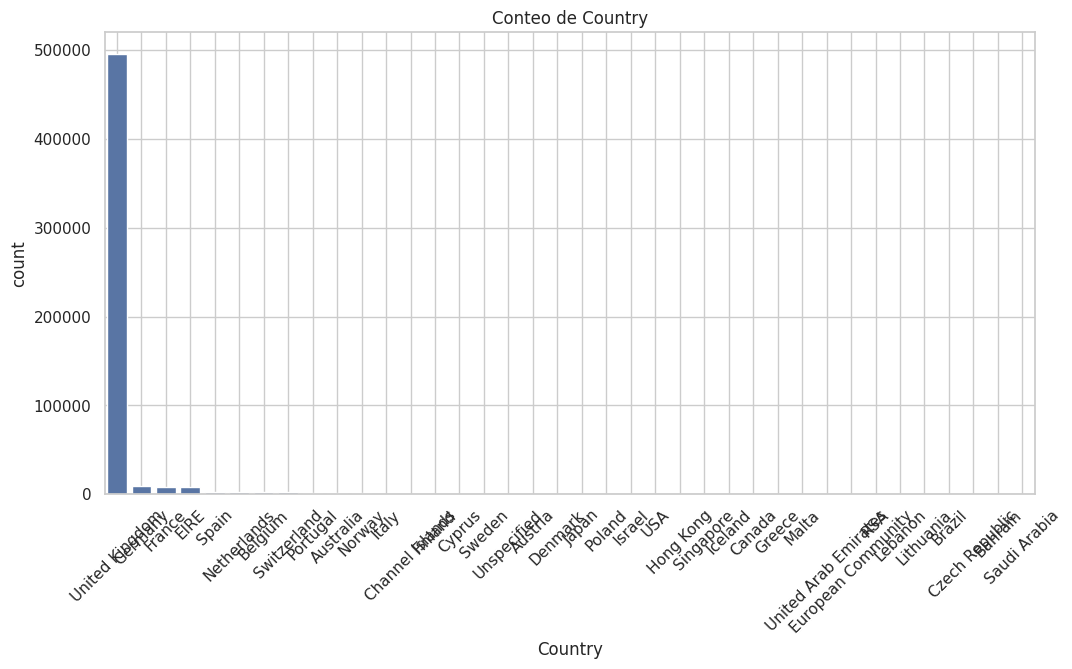


InvoiceNo:

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
581483        1
581566        1
C581499       1
C536383       1
C536379       1
Name: count, Length: 25900, dtype: int64

Porcentajes:

InvoiceNo
573585     0.21
581219     0.14
581492     0.13
580729     0.13
558475     0.13
           ... 
581483     0.00
581566     0.00
C581499    0.00
C536383    0.00
C536379    0.00
Name: proportion, Length: 25900, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

categorical_vars = ['Country', 'InvoiceNo']  # Reemplaza con columnas categóricas válidas de tu DataFrame

import numpy as np

# Define numerical_vars before using it in the loop
numerical_vars = ['UnitPrice', 'Quantity']  # Define las columnas numéricas que deseas analizar

print("Histograma de variables numéricas con escala log:\n")
for col in numerical_vars:
    plt.figure()
    # Evita errores con valores <= 0
    datos = df[col][df[col] > 0]
    sns.histplot(np.log1p(datos), kde=True, bins=30)
    plt.title(f'Histograma log({col})')
    plt.xlabel(f'log({col})')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

print("Boxplot de variables numéricas con escala log:\n")
for col in numerical_vars:
    plt.figure()
    datos = df[col][df[col] > 0]
    sns.boxplot(x=np.log1p(datos))
    plt.title(f'Boxplot log({col})')
    plt.xlabel(f'log({col})')
    plt.grid(True)
    plt.show()

print("\n--- Tablas de frecuencia (variables categóricas) ---")
for col in categorical_vars:
    print(f"\n{col}:\n")
    print(df[col].value_counts())
    print("\nPorcentajes:\n")
    print((df[col].value_counts(normalize=True) * 100).round(2))

    # Gráfico de barras
    plt.figure()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Conteo de {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

Como podemos observar aquí una gran parte de las compras online se originan desde Reino Unido, con una gran diferencia de valores más altos en comparación a los otros países.

Además, los precios tienen una evidente tendencia a la media, no obstante, poseen ciertos casos de precios bastante altos alejados de la tendencia.